# \[expt 02\]: Distance Gray

## Introduction

When we convert a road image to gray scale, the color of the road would be in the med of the scale, and some of the cars colors would be bellow it, and some of them would be above it, like the following image:

<img src="img/02/img_01.png"/>

The problem is that we cannot apply binary thresholding without loosing the cars.

In this lab, we'll try a better way (i.e. Distance Gray) to convert Road-Image to grayscale, which will fix that problem, and then we'll convert it to binary to compare the results.

## Background

The idea of distance gray is to replace each pixel in the image (which has 3 values) with the ecludian distance between its and a specific base color (i.e. the street color).

As a test, we'll hard coded the street color, but later we can make it calculated depending on the image (e.g. by choosing the most repeated color in the image after removing fixed stuff). 

We can calculate the distance between $P$ vector and $C$ vector with the same length $n$ by the following formula:

$$ D=\sqrt{\sum_{i=1}^n{(p_i - c_i)^2}} $$

After that, we'll normalize the image to get better results.

## Implementation

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [25]:
def img_to_dist_gray(img, base_color):
    """
    Convert the given `img` to grayscale depending on how
    much each pixel is difference with the `base_color`.
    """
    hight, width, num_channels = img.shape

    pixels = img.reshape((hight * width, num_channels))

    img_dist_gray = np.array([
        np.sqrt(np.sum((base_color - pixel) ** 2))
        for pixel in pixels
    ]).reshape(hight, width)

    img_dist_gray_norm = cv2.normalize(
        src=img_dist_gray,
        dst=None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX,
        dtype=cv2.CV_8U,
    )

    return img_dist_gray_norm

In [26]:
def street_color(road_img):
    """
    Calculate the street color (or shoud be doing that, now its just return a static value ... )
    """
    road_color = (110, 114, 109)
    return road_color

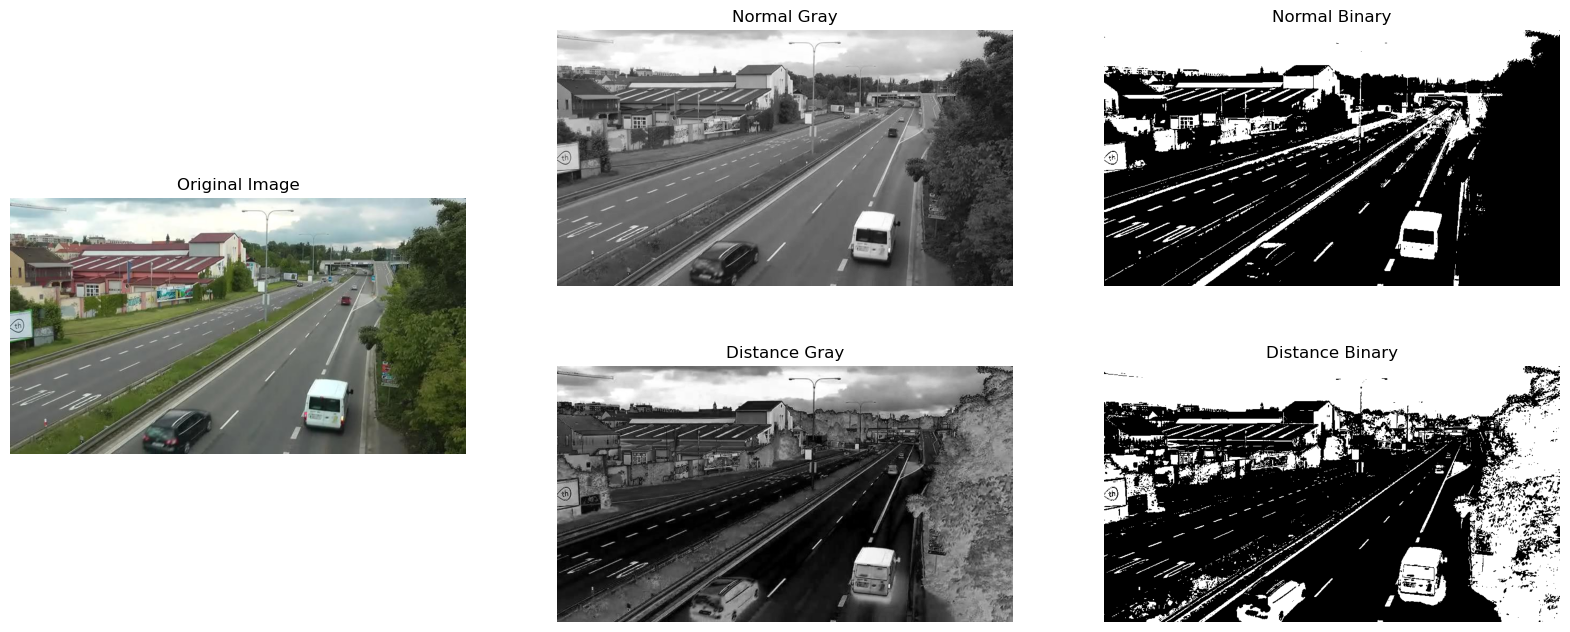

In [27]:
img = plt.imread('../dataset/frames/train/00010/00010_2280.jpg')
img_norm_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_norm_bin = cv2.threshold(img_norm_gray, 127, 255, cv2.THRESH_BINARY)[1]
img_dist_gray = img_to_dist_gray(img, street_color(img))
img_distance_bin = cv2.threshold(img_dist_gray, 90, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(20, 8))

plt.subplot(2, 3, (1, 4))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_norm_gray, cmap='gray')
plt.title('Normal Gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_norm_bin, cmap='gray')
plt.title('Normal Binary')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_dist_gray, cmap='gray')
plt.title('Distance Gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_distance_bin, cmap='gray')
plt.title('Distance Binary')
plt.axis('off')

os.makedirs('out/02/', exist_ok=True)
plt.savefig('out/02/normal_gray_vs_distance_gray.png')

## Conclusion

As conclusion, the distance gray gave a much better results comparing to normal gray.